In [30]:
# Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [4]:
df = pd.read_csv("Heart_Disease_Dataset.csv")

### General data information

In [6]:
# Find the shape of the dataset
shape = df.shape
print("dataset shape: " , shape)

dataset shape:  (1190, 12)


In [8]:
# Check the missing entries in the dataset columns
missings = df.isnull().aggregate(np.any, axis='index')
print(missings)

# Check if all missing indexes are False
if not missings.any():
    print("There are no missing values in the DataFrame.")
else:
    print("There are missing values in the following columns:")
    for column, has_missing in missings.items():
        if has_missing:
            print(f"Column '{column}' has missing values.")

age                    False
sex                    False
chest pain type        False
resting bp s           False
cholesterol            False
fasting blood sugar    False
resting ecg            False
max heart rate         False
exercise angina        False
oldpeak                False
ST slope               False
target                 False
dtype: bool
There are no missing values in the DataFrame.


In [17]:
# Check dataset is balanced or not.
balanced = df.groupby('target')['age'].count()
print(balanced)

target
0    561
1    629
Name: age, dtype: int64


So the dataset is balanced.

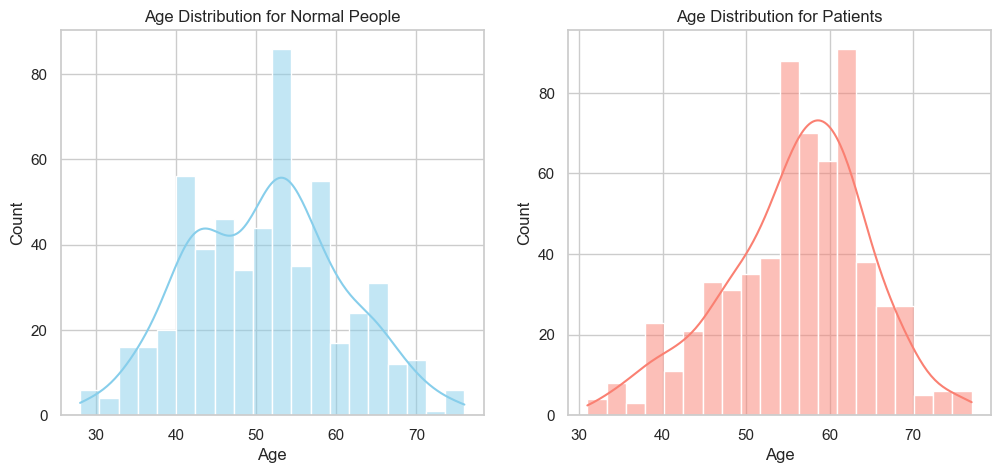

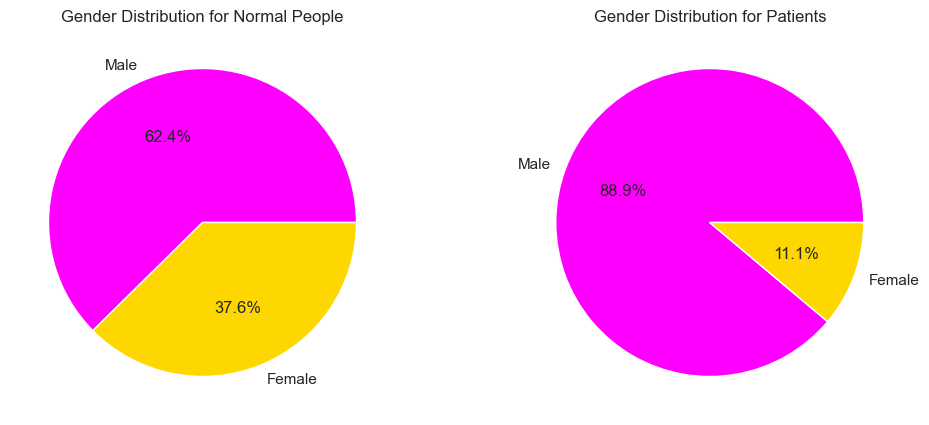

In [23]:
# Separate data into normal and patient groups
normal_data = df[df['target'] == 0]
patient_data = df[df['target'] == 1]

# Set style for the plots
sns.set(style="whitegrid")

# Create subplots for age distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(normal_data['age'], bins=20, color='skyblue', kde=True, ax=axes[0])
axes[0].set_xlabel('Age')
axes[0].set_title('Age Distribution for Normal People')

sns.histplot(patient_data['age'], bins=20, color='salmon', kde=True, ax=axes[1])
axes[1].set_xlabel('Age')
axes[1].set_title('Age Distribution for Patients')

# Create subplots for gender distribution
fig2, axes2 = plt.subplots(1, 2, figsize=(12, 5))

normal_gender_counts = normal_data['sex'].value_counts()
patient_gender_counts = patient_data['sex'].value_counts()

axes2[0].pie(normal_gender_counts, labels=['Male', 'Female'], autopct='%1.1f%%', colors=['magenta', 'gold'])
axes2[0].set_title(f'Gender Distribution for Normal People')

axes2[1].pie(patient_gender_counts, labels=['Male', 'Female'], autopct='%1.1f%%', colors=['magenta', 'gold'])
axes2[1].set_title(f'Gender Distribution for Patients')

plt.show()

### Remove outliers

In [25]:
# Define the threshold
threshold = 3

# Calculate the Z-score for each feature
z_scores = np.abs((df - df.mean()) / df.std())

# Identify outliers by comparing Z-scores with the threshold
outliers = z_scores > threshold

# Create a new DataFrame without outliers
df_no_outliers = df[~outliers.any(axis=1)]

# Print the original and cleaned DataFrames
print("Original DataFrame Shape:")
print(df.shape)
print("\nDataFrame Without Outliers Shape:")
print(df_no_outliers.shape)

Original DataFrame Shape:
(1190, 12)

DataFrame Without Outliers Shape:
(1162, 12)


### Normalize nuⅿeriⅽaⅼ data

In [26]:
# Define the numeric columns to be normalized
numeric_columns = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

# Normalize the specified columns
df[numeric_columns] = (df[numeric_columns] - df[numeric_columns].min()) / (df[numeric_columns].max() - df[numeric_columns].min())

### SVM

In [28]:
# Define feature variable
X = df.drop('target', axis=1) 
# Define target variable
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
# Define a function that returns accuracy, precision, recall, f1score.
def report_function (y_true, y_pred):
    TP = np.sum((y_pred == 1) & (y_true == 1))
    FP = np.sum((y_pred == 1) & (y_true == 0))
    FN = np.sum((y_pred == 0) & (y_true == 1))
    Accuracy = np.mean(y_true == y_pred)
    Precision = TP / (TP + FP)
    Recall = TP / (TP + FN)
    F1score = 2 * Precision * Recall / (Precision + Recall)
    return Accuracy, Precision, Recall, F1score

#### 1. Linear

In [32]:
clf_linear = SVC(C=1, kernel='linear')
clf_linear.fit(X_train, y_train)
y_pred = clf_linear.predict(X_test)
results = report_function(y_test, y_pred)

print("Results of sklearn SVM linear kernel:")
print("Accuracy: {:.2f}".format(results[0]))
print("Precision: {:.2f}".format(results[1]))
print("Recall: {:.2f}".format(results[2]))
print("F1-score: {:.2f}".format(results[3]))

Results of sklearn SVM linear kernel:
Accuracy: 0.87
Precision: 0.88
Recall: 0.88
F1-score: 0.88


#### 2. Polynomial

In [43]:
clf_poly = SVC(C=3, kernel='poly', degree=8, coef0=3, gamma=1)
clf_poly.fit(X_train, y_train)
y_pred = clf_poly.predict(X_test)
results = report_function(y_test, y_pred)

print("Results of sklearn SVM polynomial kernel:")
print("Accuracy: {:.2f}".format(results[0]))
print("Precision: {:.2f}".format(results[1]))
print("Recall: {:.2f}".format(results[2]))
print("F1-score: {:.2f}".format(results[3]))

Results of sklearn SVM polynomial kernel:
Accuracy: 0.84
Precision: 0.91
Recall: 0.80
F1-score: 0.85


#### 3. RBF

In [34]:
clf_rbf = SVC(C=3, kernel='rbf', gamma=20)
clf_rbf.fit(X_train, y_train)
y_pred = clf_rbf.predict(X_test)
results = report_function(y_test, y_pred)

print("Results of sklearn SVM RBF kernel:")
print("Accuracy: {:.2f}".format(results[0]))
print("Precision: {:.2f}".format(results[1]))
print("Recall: {:.2f}".format(results[2]))
print("F1-score: {:.2f}".format(results[3]))

Results of sklearn SVM RBF kernel:
Accuracy: 0.89
Precision: 0.87
Recall: 0.94
F1-score: 0.90
